In [389]:
import numpy as np
import pandas as pd

# Rested Stragegies

Daily activities provide maximum rewards twice per day. Skipping activities allows accumulates a rested bonus whereby each skipped activity generates 50% of one bar, and a full bar provides (on average) 2x rewards.

Pure Strategies:
- Maximum reward: 2 each day (no rest accumulated, 1x reward per activity)
- Minimum time: 2 every 3rd day (accumulate 2 rested bars, 2 activities w/ 2x reward)

Mixed Strategies:
- 1 each day (1x for 2 days, 2x for one day, repeating)
- 2 every other day (1 rested 1 normal every other day)
- others...

While the maximum return strategy is to do the full 2x per day, this can be prohibitively time consuming across multiple characters. Here I want to compare different strategies to optimize time investment vs rewards. This will also be useful for estimating bounds on reward income forecasts.

Since the maximum length cycle is 3 days I will look at returns over a 90 day window.

In [390]:
df_activities = pd.DataFrame({
    'day': range(1, 91),
    'baseline': 2,
    'one_per_day': 1,
    'fully_rested': [0, 0, 2]*30,
    'skip_days': [2, 0]*45,
    '2-2-0': [2, 2, 0]*30,
    '2-1-1': [2, 1, 1]*30,
    '2-1-0': [2, 1, 0]*30,
})
df_activities

,day,baseline,one_per_day,fully_rested,skip_days,2-2-0,2-1-1,2-1-0
0,1,2,1,0,2,2,2,2
1,2,2,1,0,0,2,1,1
2,3,2,1,2,2,0,1,0
3,4,2,1,0,0,2,2,2
4,5,2,1,0,2,2,1,1
...,...,...,...,...,...,...,...,...
85,86,2,1,0,0,2,1,1
86,87,2,1,2,2,0,1,0
87,88,2,1,0,0,2,2,2
88,89,2,1,0,2,2,1,1


## Simulate

In [391]:
df_rewards = df_activities.copy(deep=True)
strategies = [column for column in df_activities if column != 'day']

for strategy in strategies:
    rewards = []
    rest_bar = 0.0
    for _, activities in df_activities[strategy].iteritems():
        rested_activities = np.min([activities, np.floor(rest_bar)])
        reward = activities + rested_activities
        rest_bar = rest_bar - rested_activities + (2 - activities) * 0.5
        rewards.append(reward)
    df_rewards[strategy] = rewards

df_rewards

,day,baseline,one_per_day,fully_rested,skip_days,2-2-0,2-1-1,2-1-0
0,1,2.0,1.0,0.0,2.0,2.0,2.0,2.0
1,2,2.0,1.0,0.0,0.0,2.0,1.0,1.0
2,3,2.0,2.0,4.0,3.0,0.0,1.0,0.0
3,4,2.0,1.0,0.0,0.0,3.0,3.0,3.0
4,5,2.0,2.0,0.0,3.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...
85,86,2.0,1.0,0.0,0.0,2.0,1.0,1.0
86,87,2.0,2.0,4.0,3.0,0.0,1.0,0.0
87,88,2.0,1.0,0.0,0.0,3.0,3.0,3.0
88,89,2.0,2.0,0.0,3.0,2.0,1.0,1.0


## Total Activities

In [392]:
cumulative_activities = df_activities[strategies].cumsum(axis=0)
cumulative_activities

,baseline,one_per_day,fully_rested,skip_days,2-2-0,2-1-1,2-1-0
0,2,1,0,2,2,2,2
1,4,2,0,2,4,3,3
2,6,3,2,4,4,4,3
3,8,4,2,4,6,6,5
4,10,5,2,6,8,7,6
...,...,...,...,...,...,...,...
85,172,86,56,86,116,115,87
86,174,87,58,88,116,116,87
87,176,88,58,88,118,118,89
88,178,89,58,90,120,119,90


In [393]:
total_activities = cumulative_activities.iloc[-1].sort_values()
total_activities

fully_rested     60
one_per_day      90
skip_days        90
2-1-0            90
2-2-0           120
2-1-1           120
baseline        180
Name: 89, dtype: int64

<AxesSubplot:>

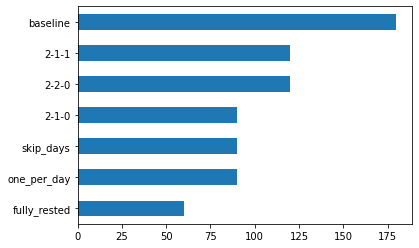

In [394]:
total_activities.plot(kind='barh')

## Total Rewards

In [395]:
cumulative_rewards = df_rewards[strategies].cumsum(axis=0)
cumulative_rewards

,baseline,one_per_day,fully_rested,skip_days,2-2-0,2-1-1,2-1-0
0,2.0,1.0,0.0,2.0,2.0,2.0,2.0
1,4.0,2.0,0.0,2.0,4.0,3.0,3.0
2,6.0,4.0,4.0,5.0,4.0,4.0,3.0
3,8.0,5.0,4.0,5.0,7.0,7.0,6.0
4,10.0,7.0,4.0,8.0,9.0,8.0,7.0
...,...,...,...,...,...,...,...
85,172.0,128.0,112.0,128.0,144.0,143.0,129.0
86,174.0,130.0,116.0,131.0,144.0,144.0,129.0
87,176.0,131.0,116.0,131.0,147.0,147.0,132.0
88,178.0,133.0,116.0,134.0,149.0,148.0,133.0


In [396]:
total_rewards = cumulative_rewards.iloc[-1].sort_values()
total_rewards

fully_rested    120.0
2-1-0           133.0
one_per_day     134.0
skip_days       134.0
2-2-0           149.0
2-1-1           149.0
baseline        180.0
Name: 89, dtype: float64

<AxesSubplot:>

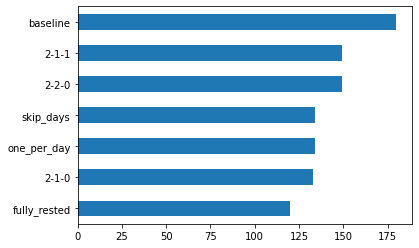

In [397]:
total_rewards.plot(kind='barh')

## Efficiency (% of max rewards over time period)

In [398]:
reward_efficiency = (total_rewards / total_rewards['baseline']).sort_values()
reward_efficiency

fully_rested    0.666667
2-1-0           0.738889
one_per_day     0.744444
skip_days       0.744444
2-2-0           0.827778
2-1-1           0.827778
baseline        1.000000
Name: 89, dtype: float64

<AxesSubplot:>

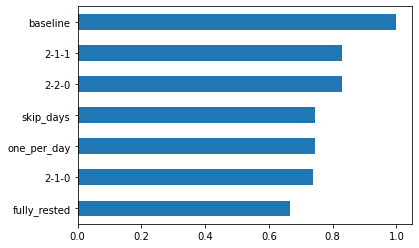

In [399]:
reward_efficiency.plot(kind='barh')


## Average Rewards Per Activity

In [400]:
average_rewards = (total_rewards / total_activities).sort_values()
average_rewards

baseline        1.000000
2-1-1           1.241667
2-2-0           1.241667
2-1-0           1.477778
one_per_day     1.488889
skip_days       1.488889
fully_rested    2.000000
Name: 89, dtype: float64

<AxesSubplot:>

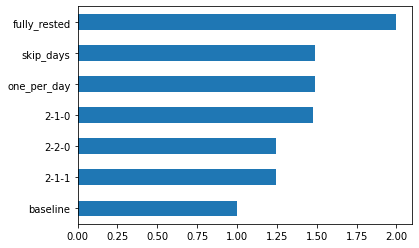

In [401]:
average_rewards.plot(kind='barh')